#### I'm not the proudest of the way I coded this up, but it gets the job done... Please tell me if you'd like me to make it look better!

In [1]:
import morfeus
from rdkit import rdBase, Chem
from chiralizer import chiralizer, tokenizer
from pathlib import Path
import matplotlib.pyplot as plt
import os
from adjustText import adjust_text
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
smiles_file = open('sidechain_smiles.smi', 'r')
smiles = smiles_file.read().splitlines()

In [4]:
len(smiles)

52

## analyzing properties of chiral peptoids

separating chiral and achiral peptoids

In [5]:
smiles[47]

'NC(C)C1CCCCC1'

In [6]:
chiral_smiles = [chiralizer(smiles[i])[1] for i in range(len(smiles)) if chiralizer(smiles[i])[0]]

In [7]:
chiral_directory = Path('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/data/chiral_xyz/')

converting smiles to xyz done on conda command line

### calculating properties

In [8]:
# list of properties
bv_list, disp_list, sasa_list = [], [], []

for filename in os.listdir(chiral_directory):
    if filename.endswith('.xyz'):
        elements, coordinates = morfeus.read_xyz('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/data/chiral_xyz/' + filename)

        # appending results to lists
        bv_list.append((os.path.splitext(filename)[0], morfeus.BuriedVolume(elements, coordinates, 1).fraction_buried_volume))
#        cone_list.append((os.path.splitext(filename)[0], morfeus.ConeAngle(elements, coordinates, 1).cone_angle)) # Exception: ('Atoms within vdW radius of central atom:', '2 6 7')
        disp_list.append((os.path.splitext(filename)[0], morfeus.Dispersion(elements, coordinates).p_int)) # P_int value
        sasa_list.append((os.path.splitext(filename)[0], morfeus.SASA(elements, coordinates).area)) # 
#        ster_list.append((os.path.splitext(filename)[0], morfeus.Sterimol(elements, coordinates, 1, 2).L_value)) # L value
#        xtb_list.append((os.path.splitext(filename)[0], morfeus.XTB(elements,coordinates).get_ip(corrected=True))) # corrected ionization potential   # need to dl xtra to work                      

reading xtb

In [9]:
chiral_xtb_np = np.load('data/chiral_xtb_data.npy', allow_pickle=True) 

In [10]:
chiral_xtb = chiral_xtb_np.tolist()

In [11]:
chiral_xtb # LUMO, Q+, H_idx

[[0.04515455792156718, 0.04723985907949065, 11.0],
 [0.03927121388787162, 0.042428341365640665, 12.0],
 [-0.24831775473200776, 0.1733040053151227, 29.0],
 [-0.2422478363324708, 0.19386728620873592, 29.0],
 [-0.22550488120016648, 0.04717266679042939, 15.0],
 [-0.22357409672258088, 0.03119542807124677, 16.0],
 [-0.377717788260388, 0.06196941071965072, 18.0],
 [-0.37578439618318804, 0.06390027493955394, 18.0],
 [-0.2266329971483791, 0.057607532961715995, 20.0],
 [-0.2216290188494396, 0.0573634641967672, 20.0],
 [-0.24796612708940438, 0.056540627286066035, 19.0],
 [-0.24461992322474202, 0.0570537172520752, 28.0],
 [-0.23740001878938008, 0.057418186428961696, 19.0],
 [-0.2344845397744955, 0.05791988150779895, 19.0],
 [-0.2188796608479943, 0.1625464829275789, 26.0],
 [-0.22641450954687367, 0.18627929070751917, 26.0],
 [-0.32789752219506074, 0.0776017431447606, 20.0],
 [-0.3247213713102522, 0.07928638718623925, 20.0],
 [-0.23332914067564922, 0.04175890920658461, 13.0],
 [-0.2341921361883021, 

In [12]:
left_xtb = []
right_xtb = []

while chiral_xtb:
    right_xtb.append(chiral_xtb.pop())
    left_xtb.append(chiral_xtb.pop())

In [13]:
left_xtb.reverse()
right_xtb.reverse()

In [14]:
left_lumo = [i[0] for i in left_xtb]
left_Q = [i[1] for i in left_xtb]
left_H = [i[2] for i in left_xtb]

right_lumo = [i[0] for i in right_xtb]
right_Q = [i[1] for i in right_xtb]
right_H = [i[2] for i in right_xtb]

### separating left and right

In [15]:
left_bv = [i[1] for i in bv_list if 'a' in i[0]]
right_bv = [i[1] for i in bv_list if 'b' in i[0]]

left_disp = [i[1] for i in disp_list if 'a' in i[0]]
right_disp = [i[1] for i in disp_list if 'b' in i[0]]

left_sasa = [i[1] for i in sasa_list if 'a' in i[0]]
right_sasa = [i[1] for i in sasa_list if 'b' in i[0]]

In [16]:
labels = [i[0] for i in bv_list if 'a' in i[0]]

### plotting

In [17]:
chiral_props = {
    'buried volume' : (left_bv, right_bv),
    'SASA area' : (left_sasa, right_sasa),
    'dispersion descriptor p_int' : (left_disp, right_disp),
    'LUMO' : (left_lumo, right_lumo),
    'Q+' : (left_Q, right_Q)
} 

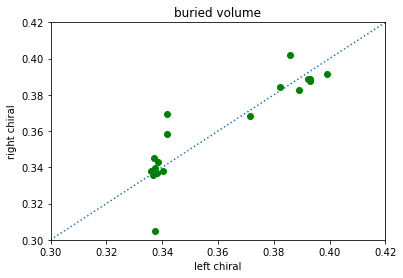

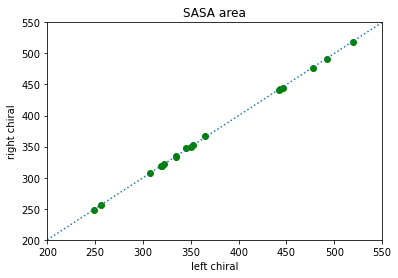

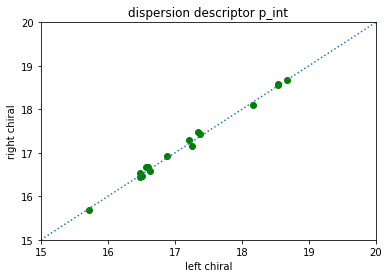

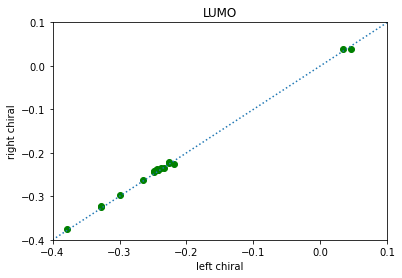

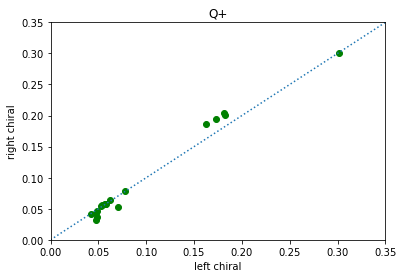

In [18]:
for key in chiral_props:
    plt.scatter(chiral_props[key][0], chiral_props[key][1], c='g', )
    plt.axline([0, 0], [1, 1], linestyle=':')
    plt.xlabel("left chiral")
    plt.ylabel("right chiral")
    plt.title(key)
    if key == "buried volume":
        plt.axis([0.3, 0.42, 0.3, 0.42])
    elif key == "dispersion descriptor p_int":
        plt.axis([15, 20, 15, 20])
    elif key == "SASA area":
        plt.axis([200, 550, 200, 550])
    elif key == "LUMO":
        plt.axis([-0.4, 0.1, -0.4, 0.1])
    elif key == "Q+":
        plt.axis([0.0, 0.35, 0.0, 0.35])
#    texts = [plt.text(chiral_props[key][0][i], chiral_props[key][1][i], label.replace("a", "")) for i, 
#             label in enumerate(labels)
#            ]
#    adjust_text(texts)
#     for i, label in enumerate(labels):
#         plt.annotate(label.replace("a", ""), (chiral_props[key][0][i], chiral_props[key][1][i]))
    plt.show()

## analyzing properties of N atom

### calculating methyl props

In [20]:
methyl_smiles_file = open('methyl_smiles.smi', 'r')
methyl_smiles = methyl_smiles_file.read().splitlines()

In [21]:
methyl_directory = Path('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/data/methyl_xyz/')

In [22]:
# list of properties
bv_methyl, disp_methyl, sasa_methyl = [], [], []

for filename in os.listdir(methyl_directory):
    if filename.endswith('.xyz'):
        elements, coordinates = morfeus.read_xyz('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/data/methyl_xyz/' + filename)

        # appending results to lists
        bv_methyl.append(morfeus.BuriedVolume(elements, coordinates, 1).fraction_buried_volume)
#        cone_methyl.append(morfeus.ConeAngle(elements, coordinates, 1).cone_angle) # Exception: ('Atoms within vdW radius of central atom:', '2 6 7')
        disp_methyl.append(morfeus.Dispersion(elements, coordinates).atom_p_int[1]) # P_int value
        sasa_methyl.append(morfeus.SASA(elements, coordinates).area)
#        xtb_methyl.append(morfeus.XTB(elements,coordinates).get_ip(corrected=True)) # corrected ionization potential   # need to dl xtra to work                      

In [23]:
methyl_xtb = np.load('data/methyl_xtb_data.npy', allow_pickle=True) 

In [24]:
methyl_lumo = [i[0] for i in methyl_xtb]
methyl_Q = [i[1] for i in methyl_xtb]
methyl_H = [i[2] for i in methyl_xtb]

### calculating amine properties

In [25]:
amine_directory = Path('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/data/amine_xyz/')

In [26]:
# list of properties
bv_amine, disp_amine, sasa_amine = [], [], []

for filename in os.listdir(amine_directory):
    if filename.endswith('.xyz'):
        elements, coordinates = morfeus.read_xyz('C:/Users/Mel/Box/School/Internships/REU/PeptoidsProject/data/amine_xyz/' + filename)

        # appending results to lists
        bv_amine.append(morfeus.BuriedVolume(elements, coordinates, 1).fraction_buried_volume)
#        cone_amine.append(morfeus.ConeAngle(elements, coordinates, 1).cone_angle) # Exception: ('Atoms within vdW radius of central atom:', '2 6 7')
        disp_amine.append(morfeus.Dispersion(elements, coordinates).p_int) # P_int value
        sasa_amine.append(morfeus.SASA(elements, coordinates).area)
#        xtb_amine.append(morfeus.XTB(elements,coordinates).get_ip(corrected=True)) # corrected ionization potential   # need to dl xtra to work                      

In [27]:
amine_xtb = np.load('data/amine_xtb_data.npy', allow_pickle=True) 

In [28]:
amine_lumo = [i[0] for i in amine_xtb]
amine_Q = [i[1] for i in amine_xtb]
amine_H = [i[2] for i in amine_xtb]

### plotting

In [29]:
am_props = {
    'buried volume' : (bv_methyl, bv_amine),
    'SASA area' : (sasa_methyl, sasa_amine),
    'dispersion descriptor p_int' : (disp_methyl, disp_amine),
    'LUMO' : (methyl_lumo, amine_lumo),
    'Q+' : (methyl_Q, amine_Q)
} 

In [30]:
mol_labels = ["mol" + str(i) for i in range(1, 52)]

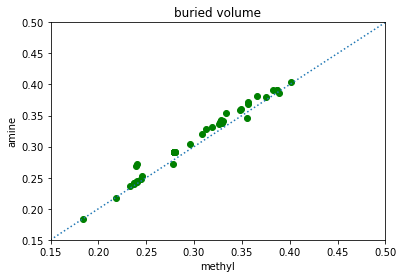

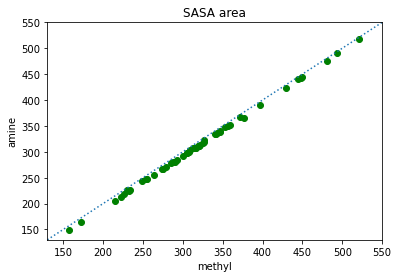

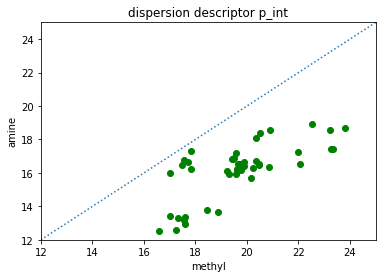

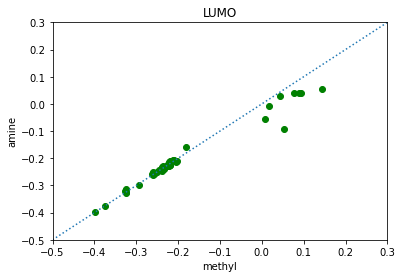

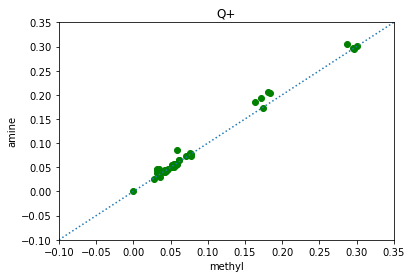

In [32]:
for key in am_props:
    plt.scatter(am_props[key][0], am_props[key][1], c='g', )
    plt.axline([0, 0], [1, 1], linestyle=':')
    plt.xlabel("methyl")
    plt.ylabel("amine")
    plt.title(key)
    if key == "buried volume":
        plt.axis([0.15, 0.5, 0.15, 0.5])
    elif key == "dispersion descriptor p_int":
        plt.axis([12, 25, 12, 25])
    elif key == "SASA area":
        plt.axis([130, 550, 130, 550])
    elif key == "LUMO":
        plt.axis([-0.5, 0.3, -0.5, 0.3])
    elif key == "Q+":
        plt.axis([-0.1, 0.35, -0.1, 0.35])
#    texts = [plt.text(am_props[key][0][i], am_props[key][1][i], 'mol%s' %i) for i in range(1, 52)]
#    adjust_text(texts)
#    for i, label in enumerate(mol_labels):
#        plt.annotate(label, (am_props[key][0][i], am_props[key][1][i]), textcoords="offset points", xytext=(0, 10))
    plt.show()